## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## **Importing necessary libraries**

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
!pip install uszipcode

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
!pip show sqlalchemy_mate

Name: sqlalchemy-mate
Version: 0.0.11
Summary: A library extend sqlalchemy module, makes CRUD easier.
Home-page: https://github.com/MacHu-GWU/
Author: Sanhe Hu
Author-email: husanhe@gmail.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: sqlalchemy
Required-by: 


In [ ]:
!pip list -v | grep uszipcode

uszipcode                          0.0.7               /usr/local/lib/python3.11/dist-packages   pip


In [ ]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# to load and manipulate data
import numpy as np
import pandas as pd

# to create and visualize visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#to split data into training and testing sets
from sklearn.model_selection import train_test_split

# to perform data preprocessing
from sklearn.preprocessing import StandardScaler

# to build decison tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to build logistic regression
from sklearn.linear_model import LogisticRegression

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)



## **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/Loan_Modelling.csv')

## **Data Overview**

### Viewing the first 5 and last 5 rows of the dataset

In [ ]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Checking the shape of the data

In [ ]:
data.shape

(5000, 14)

Data set has 5000 rows and 14 columns

### Checking the attributes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The data set has no object columns.

### Checking the Statistical Summary


In [ ]:
data.describe(include = "all").T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

Observation


1.   Minimum Age is 23 and Maximum is 67. Median age is 45.
2.   Experience is between a minimum of -3 which is inaccurate and a maximum of 43 years.
3.   Zip code is not an integer abd hence needs pre-processing.
4. Incone is between 8K and 224K with average being 73K. The data could be skewed and hence requires univariate analysis to find the distribution.
5. The family size is between 1 to 4 , with an average of 2 people in a family.
6. Avergae spending on the credit card is between 700 dollars to 10,000 dollars with an avg of 1,930 dollars
7.  Education spans between undergraduate to advanced professional. Needs further analysis on the percentage of split.
8. Mortage maximum amount is 635K and there are no data below 75th percentile. Suggests that the data is right skewed.
9. Personal loan is an int field here but in reality it is categorical. It indicates if a loan acceptance was there or not. Data indicates many but few did not accept a personal loan.
10. Securities account is also represented as an integer but really talks about if they have a securities account in the bank of not. Very few have a securities account.
11. Similarly CD_amount is the deposit account. 1 suggests they have one and 0 suggests that they do not. Very few have a CD Account as per stats
12. Credit card is represented as an int but is categorical like the last three variables we spoke about. Indicated whether they have a credit card or not issued by another bank.



In [ ]:
### Check for missing values

In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values

### Checking for duplicates

In [ ]:
data.duplicated().sum()

0

There are no duplicates in the data

### Copy the "data" dataframe into loan variable and drop ID column

In [ ]:
loan = data.copy()
loan.drop('ID', axis = 1, inplace = True)
loan.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
loan.shape

(5000, 13)

### **Pre-processing Precursor** Treat the ZIPCode column and convert that into city and state

In [ ]:
!pip install pgeocode
import pgeocode


# Initialize the Nominatim geocoder for the US
nomi = pgeocode.Nominatim('us')

# Function to extract city and state
def extract_city_state(zip_code):
    try:
        geo_data = nomi.query_postal_code(zip_code)
        return geo_data['place_name'], geo_data['state_name']
    except:
        return None, None

# Apply the function to your zip code column
loan[['city', 'state']] = loan['ZIPCode'].astype(str).apply(lambda x: pd.Series(extract_city_state(x)))

# Print the updated DataFrame
print(loan)


      Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0      25           1      49    91107       4    1.6          1         0   
1      45          19      34    90089       3    1.5          1         0   
2      39          15      11    94720       1    1.0          1         0   
3      35           9     100    94112       1    2.7          2         0   
4      35           8      45    91330       4    1.0          2         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
4995   29           3      40    92697       1    1.9          3         0   
4996   30           4      15    92037       4    0.4          1        85   
4997   63          39      24    93023       2    0.3          3         0   
4998   65          40      49    90034       3    0.5          2         0   
4999   28           4      83    92612       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  Cr

In [ ]:
loan.head(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   
5   37          13      29    92121       4    0.4          2       155   
6   53          27      72    91711       2    1.5          2         0   
7   50          24      22    93943       1    0.3          3         0   
8   35          10      81    90089       3    0.6          2       104   
9   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   
5              0                   0           0       1           0   
6              0                   0           0       1           0   
7              0                   0           0       0           1   
8              0                   0           0       1           0   
9              1                   0           0       0           0   

            city       state  
0       Pasadena  California  
1    Los Angeles  California  
2       Berkeley  California  
3  San Francisco  California  
4     Northridge  California  
5      San Diego  California  
6      Claremont  California  
7       Monterey  California  
8    Los Angeles  California  
9           Ojai  California

In [ ]:
#explorying the null values added in the dataframe from the city and state lists
loan['city'].isnull().value_counts()

False    4959
True       41
Name: city, dtype: int64

In [ ]:
loan['state'].isnull().value_counts()

False    4959
True       41
Name: state, dtype: int64

## **Exploratory Data Analysis.**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

For the Univariate analysis, we will do first the analysis of all numeric variables and then we will do the analysis of categorical(represented by a number this case). The following numerical variables will be assessed.

1. Customer Age
2. Experience
3. Income
4. CC average
5. Mortgage





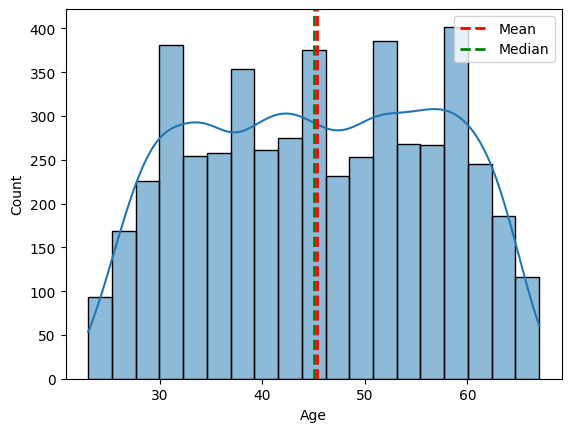

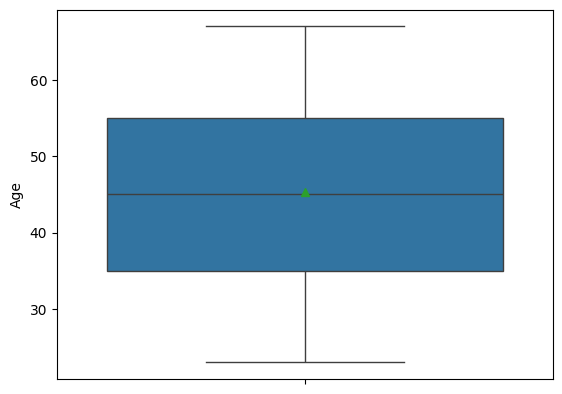

In [ ]:
# First Numeric variable - Age
sns.histplot(loan['Age'], kde = True)
plt.axvline(np.mean(loan['Age']), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(loan['Age']), color='g', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()
sns.boxplot(loan['Age'], showmeans=True)
plt.show()


*Observation* -
1. Mean of the age is about 45 years. 25th percentile is about 36 years and 75th percentile is about 55 years old.
2. The distribution seems to be normal with several peaks but no outliers.

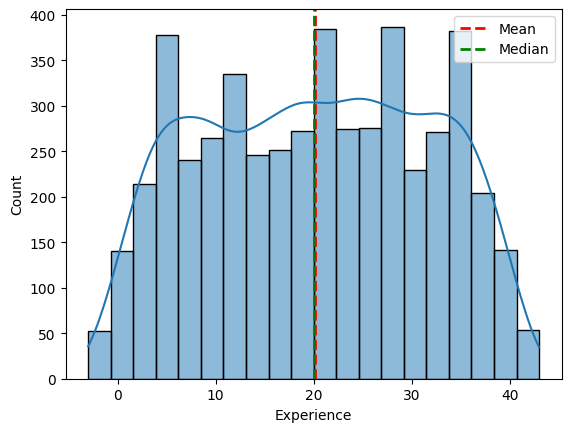

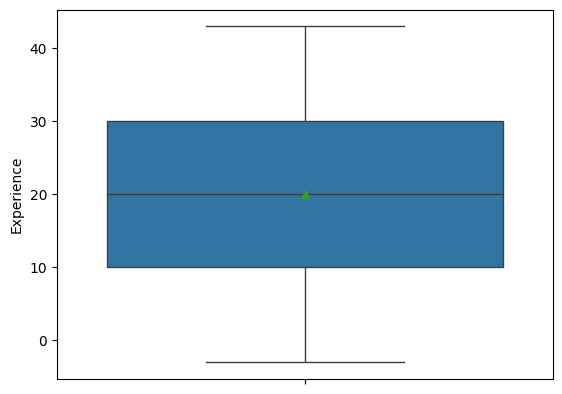

In [ ]:
# Second Numeric variable - Experience
sns.histplot(loan['Experience'], kde = True)
plt.axvline(np.mean(loan['Experience']), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(loan['Experience']), color='g', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()
sns.boxplot(loan['Experience'], showmeans=True)
plt.show()

*Observation* -

1. Mean and Median is about 20 years of experience. 25th percentile is about 10 years of work experience and 75th percentile is about 30 years of age.
2. The distribution is normal with no major outliers observed.

In [ ]:
# Third Numeric variable - Income
sns.histplot(loan['Income'], kde = True)
plt.axvline(np.mean(loan['Income']), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(loan['Income']), color='g', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()
sns.boxplot(loan['Income'], showmeans=True)
plt.show()

*Observation* -
1. The distribution is right skewed where median is less than mean. This indicates that there are outlier in the distribution.
2. The median income is closer to 60K and avg is about 70K dollars.

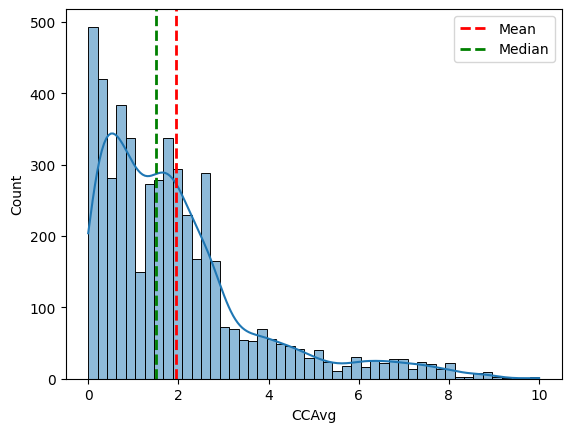

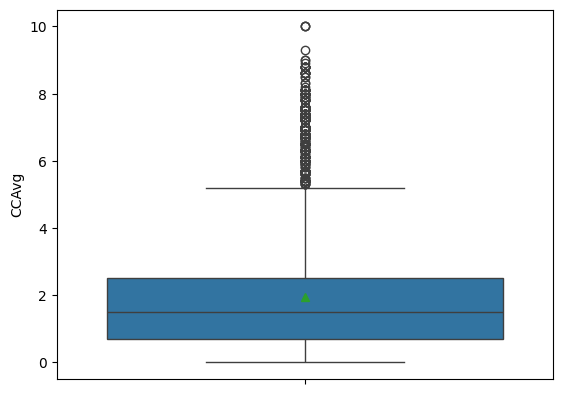

In [ ]:
# Fourth Numeric variable - CC Average
sns.histplot(loan['CCAvg'], kde = True)
plt.axvline(np.mean(loan['CCAvg']), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(loan['CCAvg']), color='g', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()
sns.boxplot(loan['CCAvg'], showmeans=True)
plt.show()

*Observation* -

Distribution of the CC Avg is heavily skewed on the right indicating many outliers as observed closely in the box plot.

While the median spending is at about 1900 dollars, credit card spending have outliers reaching up until 10,000 dollars.

It further indicates that income may seem like a driving factor for spending.



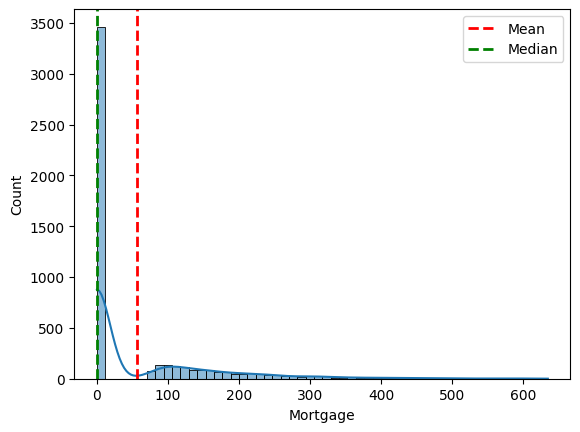

In [ ]:
# Fifth Numeric variable - Mortgage
sns.histplot(loan['Mortgage'], kde = True)
plt.axvline(np.mean(loan['Mortgage']), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(loan['Mortgage']), color='g', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.show()
sns.boxplot(loan['Mortgage'], showmeans=True)
plt.show()

*Observation* -

The distribution is extremely right skewed indicting not a lot of folks have availed mortgages in this bank. FOr customer who have mortgages in this bank it indicates that the majority of them range between 250k to 650K with a significantly less portion of the population having a 50k to 100k mortgage amount.

We continue to analyze the following categorical variables as part of the Univariate analysis -

1. Family Size
2. Education
3. Personal Loan
4. CD Account
5. Online
6. Credit Card
7. City

Ultimately in this project, we intend to drop the zip code columns due to its nature to introduce a lot of variables on preprocessing. Instead we will create dummy variable for City and State as seen in the loan dataset and continue with our modelling

In [ ]:
# Univariate analysis of Famil Size. Using countplot for categorical variable analysis.
a = sns.countplot(x='Family', data=loan)

# Calculate percentage of eachg category
total = len(loan)
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3  # Adjust vertical offset as needed
    a.text(x, y, percentage, ha='center')

# Add title and labels
plt.title('Count Plot of Family Size')
plt.xlabel('Family')
plt.ylabel('Count')

# Show the plot
plt.show()

Family size of 1 and 2 are in majority followed by Family size of 4 and then followed by 3.

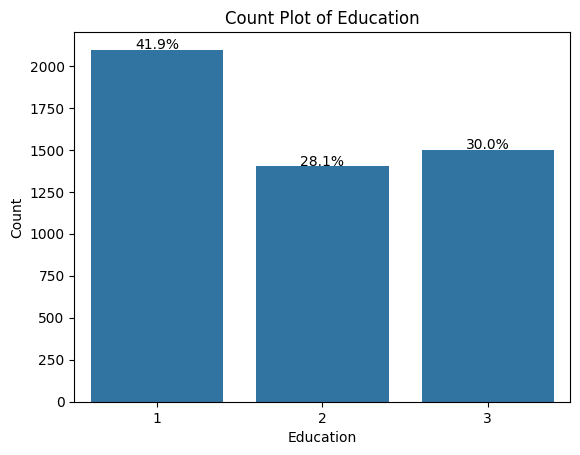

In [ ]:
# Analysis of Education through count plot

a = sns.countplot(x='Education', data=loan)

# Calculate percentage of eachg category
total = len(loan)
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3  # Adjust vertical offset as needed
    a.text(x, y, percentage, ha='center')
# Add title and labels
plt.title('Count Plot of Education')
plt.xlabel('Education')
plt.ylabel('Count')

# Show the plot
plt.show()

There are about 41.9% of undergraduate in the customer base, followed by Post Grads/Advanced professional at about 30%. The Graduates make the least amount in the mix at about 28.1 %


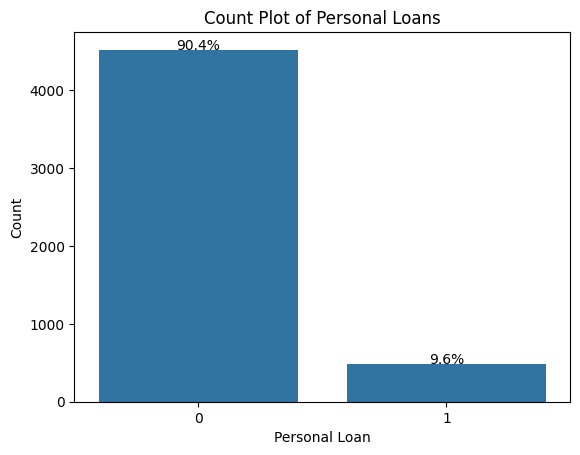

In [ ]:
# Analysis of Personal loan
a = sns.countplot(x='Personal_Loan', data=loan)

# Calculate percentage of eachg category
total = len(loan)
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3  # Adjust vertical offset as needed
    a.text(x, y, percentage, ha='center')

# Add title and labels
plt.title('Count Plot of Personal Loans')
plt.xlabel('Personal Loan')
plt.ylabel('Count')

# Show the plot
plt.show()

The above metric informs us that about 90.4% of the folks did not accept the personal loan extended to them. A mere of 9.6% of the total customer base took the loans.

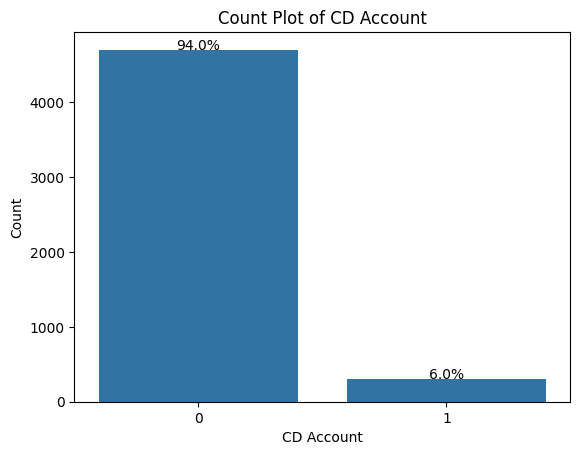

In [ ]:
# Analysis of CD_Account

a = sns.countplot(x='CD_Account', data=loan)

# Calculate percentage of eachg category
total = len(loan)
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3  # Adjust vertical offset as needed
    a.text(x, y, percentage, ha='center')

# Add title and labels
plt.title('Count Plot of CD Account')
plt.xlabel('CD Account')
plt.ylabel('Count')

# Show the plot
plt.show()

About only 6% have a CD Account and rest of the majority of the customers at about 94% do not have the CD account in the bank

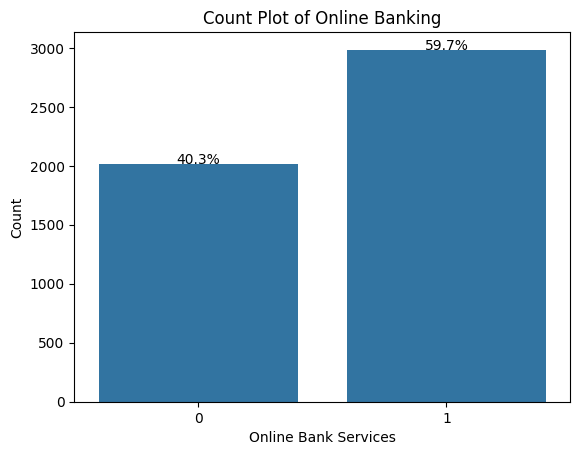

In [ ]:
#Analysis of Online Banking

a = sns.countplot(x='Online', data=loan)

# Calculate percentage of eachg category
total = len(loan)
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3  # Adjust vertical offset as needed
    a.text(x, y, percentage, ha='center')

# Add title and labels
plt.title('Count Plot of Online Banking')
plt.xlabel('Online Bank Services')
plt.ylabel('Count')

# Show the plot
plt.show()

About almost 60% of the customer base use online banking services and 40% still do not avail it. This is a good variable to analyze as we can try to look at if they use credit cards of different banks or not and that if they accept personal loans or not depending on their ease of use through online banking.

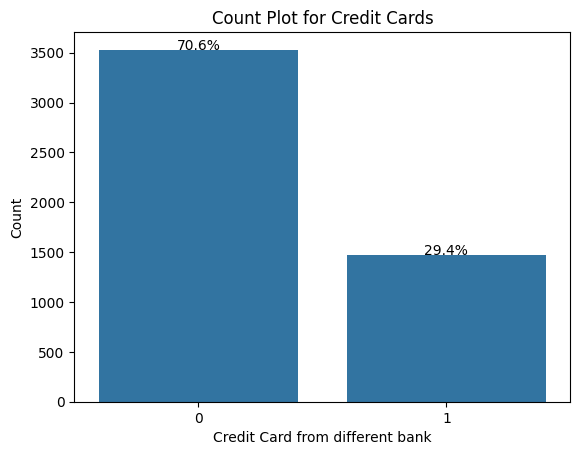

In [ ]:
# Analysing if customers have credit cards from a different banks

a = sns.countplot(x='CreditCard', data=loan)

# Calculate percentage of eachg category
total = len(loan)
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3  # Adjust vertical offset as needed
    a.text(x, y, percentage, ha='center')

# Add title and labels
plt.title('Count Plot for Credit Cards')
plt.xlabel('Credit Card from different bank')
plt.ylabel('Count')

# Show the plot
plt.show()

About 70% of the customer do not have credit cards from other bank, where as about 29.4% of customers have credit cards from a different bank. This indicates their spending limits may be higher and may be in the position to avail loans and pay them back. We will still need to do bi-variate analysis to find relevant correlations.

<Axes: xlabel='count', ylabel='city'>

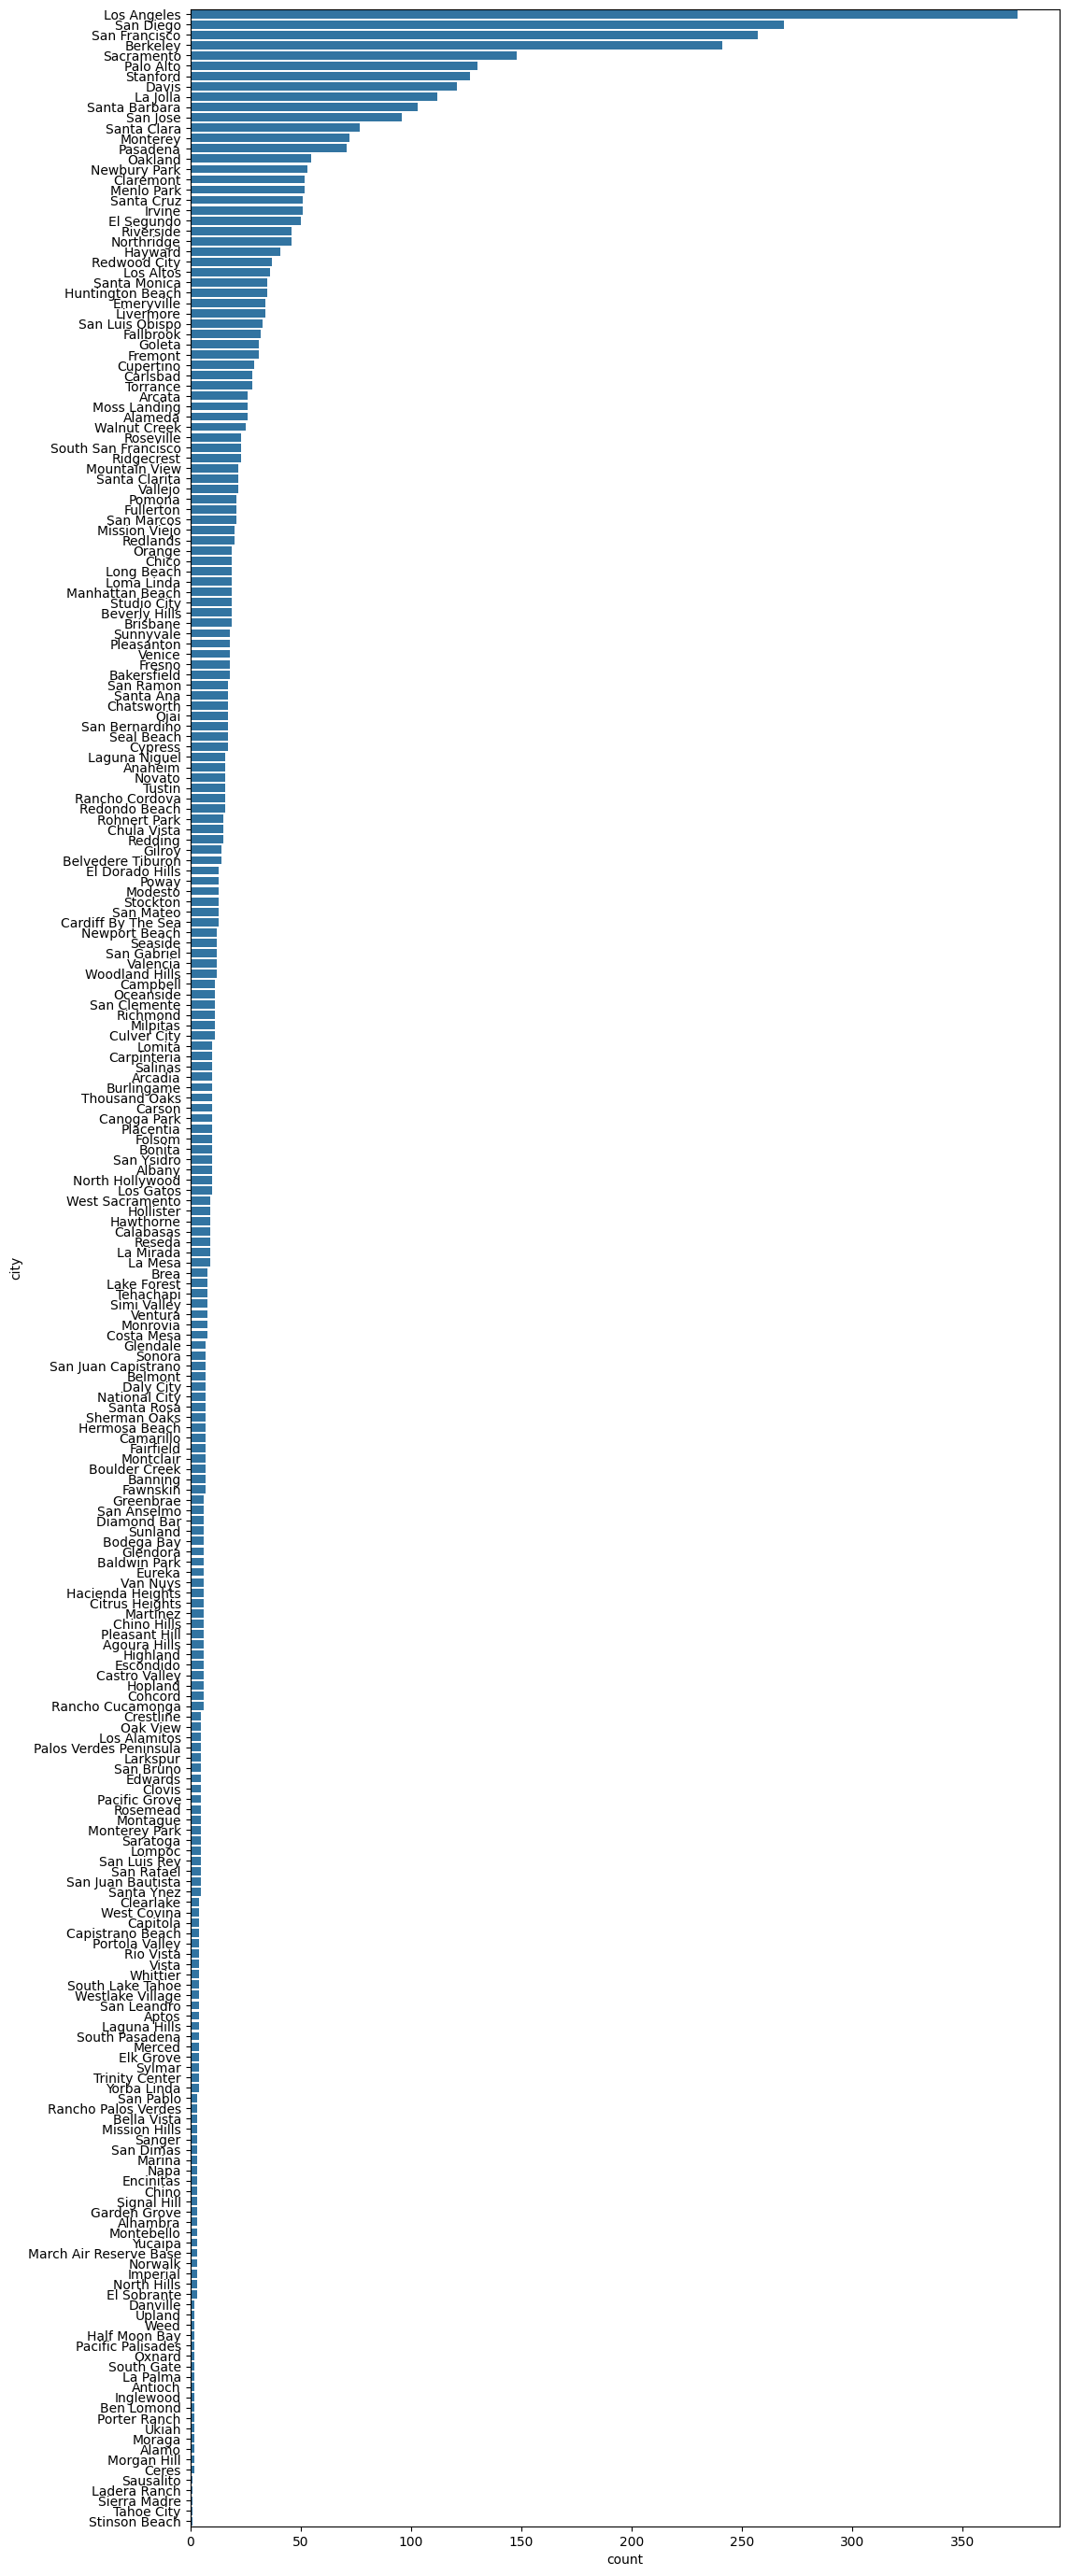

In [ ]:
# Analysis of City variable
plt.figure(figsize=(12,35))
sns.countplot(data=loan, y='city', order=loan['city'].value_counts().index)

The top 5 cities where all the customers are -

1. Los Angeles
2. San Diego
3. San Francisco
4. Berkeley and
5. Palo Alto.

### Bivariate Analysis

In [ ]:
# We will start analyzing through a pair plot


In [ ]:
sns.pairplot(loan, hue="Personal_Loan")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Observations:

It is observed that there is a very strong linear corelation between Age and Experience

It is observed that there is a slight correlation between Income and CCAvg

High concentraion of customers who accepted a personal loan are observed with
high income levels, high CCAvg (starting at approx USD 3K and above) and high Mortgage value (starting at approx USD 300K and above)



In [ ]:
# Plot a correlation matrix to find out relationship between various variables and target variable personal loan
plt.figure(figsize=(15,15))
sns.heatmap(loan.corr(),vmax=1,vmin=-1,annot=True)

<Axes: >

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

**There is a extremely skewed pattern indicating presence of outlier. The mean is greater than the median which means higher outlier values on the right is influecing the mean to be higher than the mean. It is deeply noticeable that not a lot of folks in the population have mortages. In case of mortgages, the outliers indicate the range of mortage between 250K to 650K**

2. How many customers have credit cards?

**About 70.6% customers do not have credit cards and only about 29.4% have credit cards**

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

**Income Levels, CC Avg and MOrtgage value**

4. How does a customer's interest in purchasing a loan vary with their age?

**There is no significant positive impact of age over accepting a personal loan. Infact the correlation from the above matrix seems to be in negative direction**

5. How does a customer's interest in purchasing a loan vary with their education?
**While there is no negative correlation between customer's interest vs education, there is only a slight positivity in the correlation via the education variable. It indicated that the education has little to no impact for availing  a personal load**

## **Data Preprocessing**

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

Before we proceed to data preprocessing, we have already dropped the ID column from the 'loan' dataset. We will now proceed to replace negative values from the experience column as sheet in the csv file and treat the zip code column.

### Treating the Negative values in the dataset

In [ ]:
ExpLen = len(loan[loan['Experience'] < 0])
print("There are ",ExpLen,"negative value in the dataset")

There are  52 negative value in the dataset


In [ ]:
#Replacing the negative values with median
loan["Experience"] = loan["Experience"].apply(
    lambda x: loan["Experience"].median() if x < 0 else x
)

In [ ]:
ExpLen = len(loan[loan['Experience'] < 0])
print("There are ",ExpLen,"negative value in the dataset")

There are  0 negative value in the dataset


### Dropping the ZIPCode in the dataset

From the previous EDA we have seen that ZipCode may not have a significant impact. Therefore it would be best to drop zipcode. We can use the City and State for dummy variable creation and then modelling.

In [ ]:
loan.drop("ZIPCode",axis=1,inplace=True)


In [ ]:
#Check for info of loan dataset after Zip code columns has been dropped

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  city                4959 non-null   object 
 13  state               4959 non-null   object 
dtypes: float64(2), int64(10), object(2)
memory usage: 547.0+ KB


In [ ]:
#Checking the types of data we have
loan.dtypes.value_counts()

int64      10
float64     2
object      2
dtype: int64

We see that we have 2 string columns City and State. We need to convert the columns into 0's and 1's using hot encoding method.

In [156]:
X = loan.drop('Personal_Loan',axis=1)
y = loan['Personal_Loan']

X = loan.drop('Personal_Loan',axis=1)
y = loan['Personal_Loan']

# creating dummy variables
X = pd.get_dummies(X, columns=loan.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X = pd.get_dummies(X, columns=["Education"], drop_first=True)
#dummies = pd.get_dummies(X['Education'])
#X = pd.concat([X, dummies], axis=1).drop(columns=['Education'])

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()


Age  Experience  Income  Family  CCAvg  Mortgage  Securities_Account  \
0  25.0         1.0    49.0     4.0    1.6       0.0                 1.0   
1  45.0        19.0    34.0     3.0    1.5       0.0                 1.0   
2  39.0        15.0    11.0     1.0    1.0       0.0                 0.0   
3  35.0         9.0   100.0     1.0    2.7       0.0                 0.0   
4  35.0         8.0    45.0     4.0    1.0       0.0                 0.0   

   CD_Account  Online  CreditCard  ...  city_Weed  city_West Covina  \
0         0.0     0.0         0.0  ...        0.0               0.0   
1         0.0     0.0         0.0  ...        0.0               0.0   
2         0.0     0.0         0.0  ...        0.0               0.0   
3         0.0     0.0         0.0  ...        0.0               0.0   
4         0.0     0.0         1.0  ...        0.0               0.0   

   city_West Sacramento  city_Westlake Village  city_Whittier  \
0                   0.0                    0.0            0.0   
1                   0.0                    0.0            0.0   
2                   0.0                    0.0            0.0   
3                   0.0                    0.0            0.0   
4                   0.0                    0.0            0.0   

   city_Woodland Hills  city_Yorba Linda  city_Yucaipa  Education_2  \
0                  0.0               0.0           0.0          0.0   
1                  0.0               0.0           0.0          0.0   
2                  0.0               0.0           0.0          0.0   
3                  0.0               0.0           0.0          1.0   
4                  0.0               0.0           0.0          1.0   

   Education_3  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 255 columns]

In [157]:
X.info() # Checking if there are any object or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 255 entries, Age to Education_3
dtypes: float64(255)
memory usage: 9.7 MB


In [158]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [159]:
# Splitting Data into training and test data and creating dummy variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
#Checking the train and test dataset sizes for confirmation
print(f'X_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}')

X_train shape:(4000, 255)
X_test shape:(1000, 255)


In [161]:
#checking the percentage of target variable classes in the train and test sets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.90625
1    0.09375
Name: Personal_Loan, dtype: float64
0    0.895
1    0.105
Name: Personal_Loan, dtype: float64


The train test split is close enough to now run the model

## **Model Building**

### Model Evaluation Criterion

1. Predicting a customer will accept a loan but in reality the customer would not accept a loan. - False Positive

2. Predicting a customer will not accept a loan but in reality the customer would have accepted a loan. - False Negative

3. Given the above we should probably look at the F1 Score metric and reduce both the chances of acceptance by the false negative customers as well as reduce rejection by false positive customers.

We can look at the following metrics for evaluation nevertheless -
1. Precision
2. Recall
3. F1 score and
4. Accuracy


We define a utility function to collate all the metrics into a single data frame, and another to plot the confusion matrix.

In [162]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [163]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

### Building a model using Decision Tree (Default)

In [183]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Note: We want to maximize the F1 Score to ensure that we reduce both the chances of approving non-credible applications as well as rejecting credible ones.

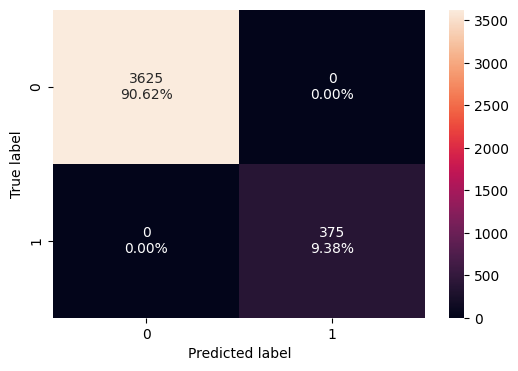

In [184]:
#Plotting the confusion matrix for the training data
plot_confusion_matrix(dtree1, X_train, y_train)

In [166]:
# Looking at the metrics of the training data
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

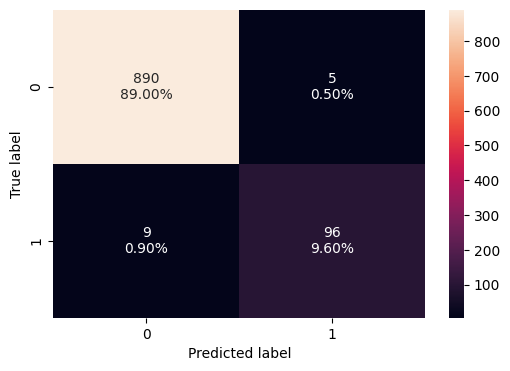

In [185]:
# Repeat the confusion matrix for test data
plot_confusion_matrix(dtree1, X_test, y_test)

In [186]:
# Getting the metrics of the default decision tree performance on test data
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

Accuracy    Recall  Precision        F1
0     0.986  0.914286   0.950495  0.932039

1. There is about 0.07 point difference in the F1 score between training and test data sets.

2. The huge difference stems in the recall score indicating there is more False Negatives. We should therefore use some performance improvement techniques like pruning( pre and post) to look at the recall score increase thus indicating reduction of false negatives.

### Visualizing the decision tree

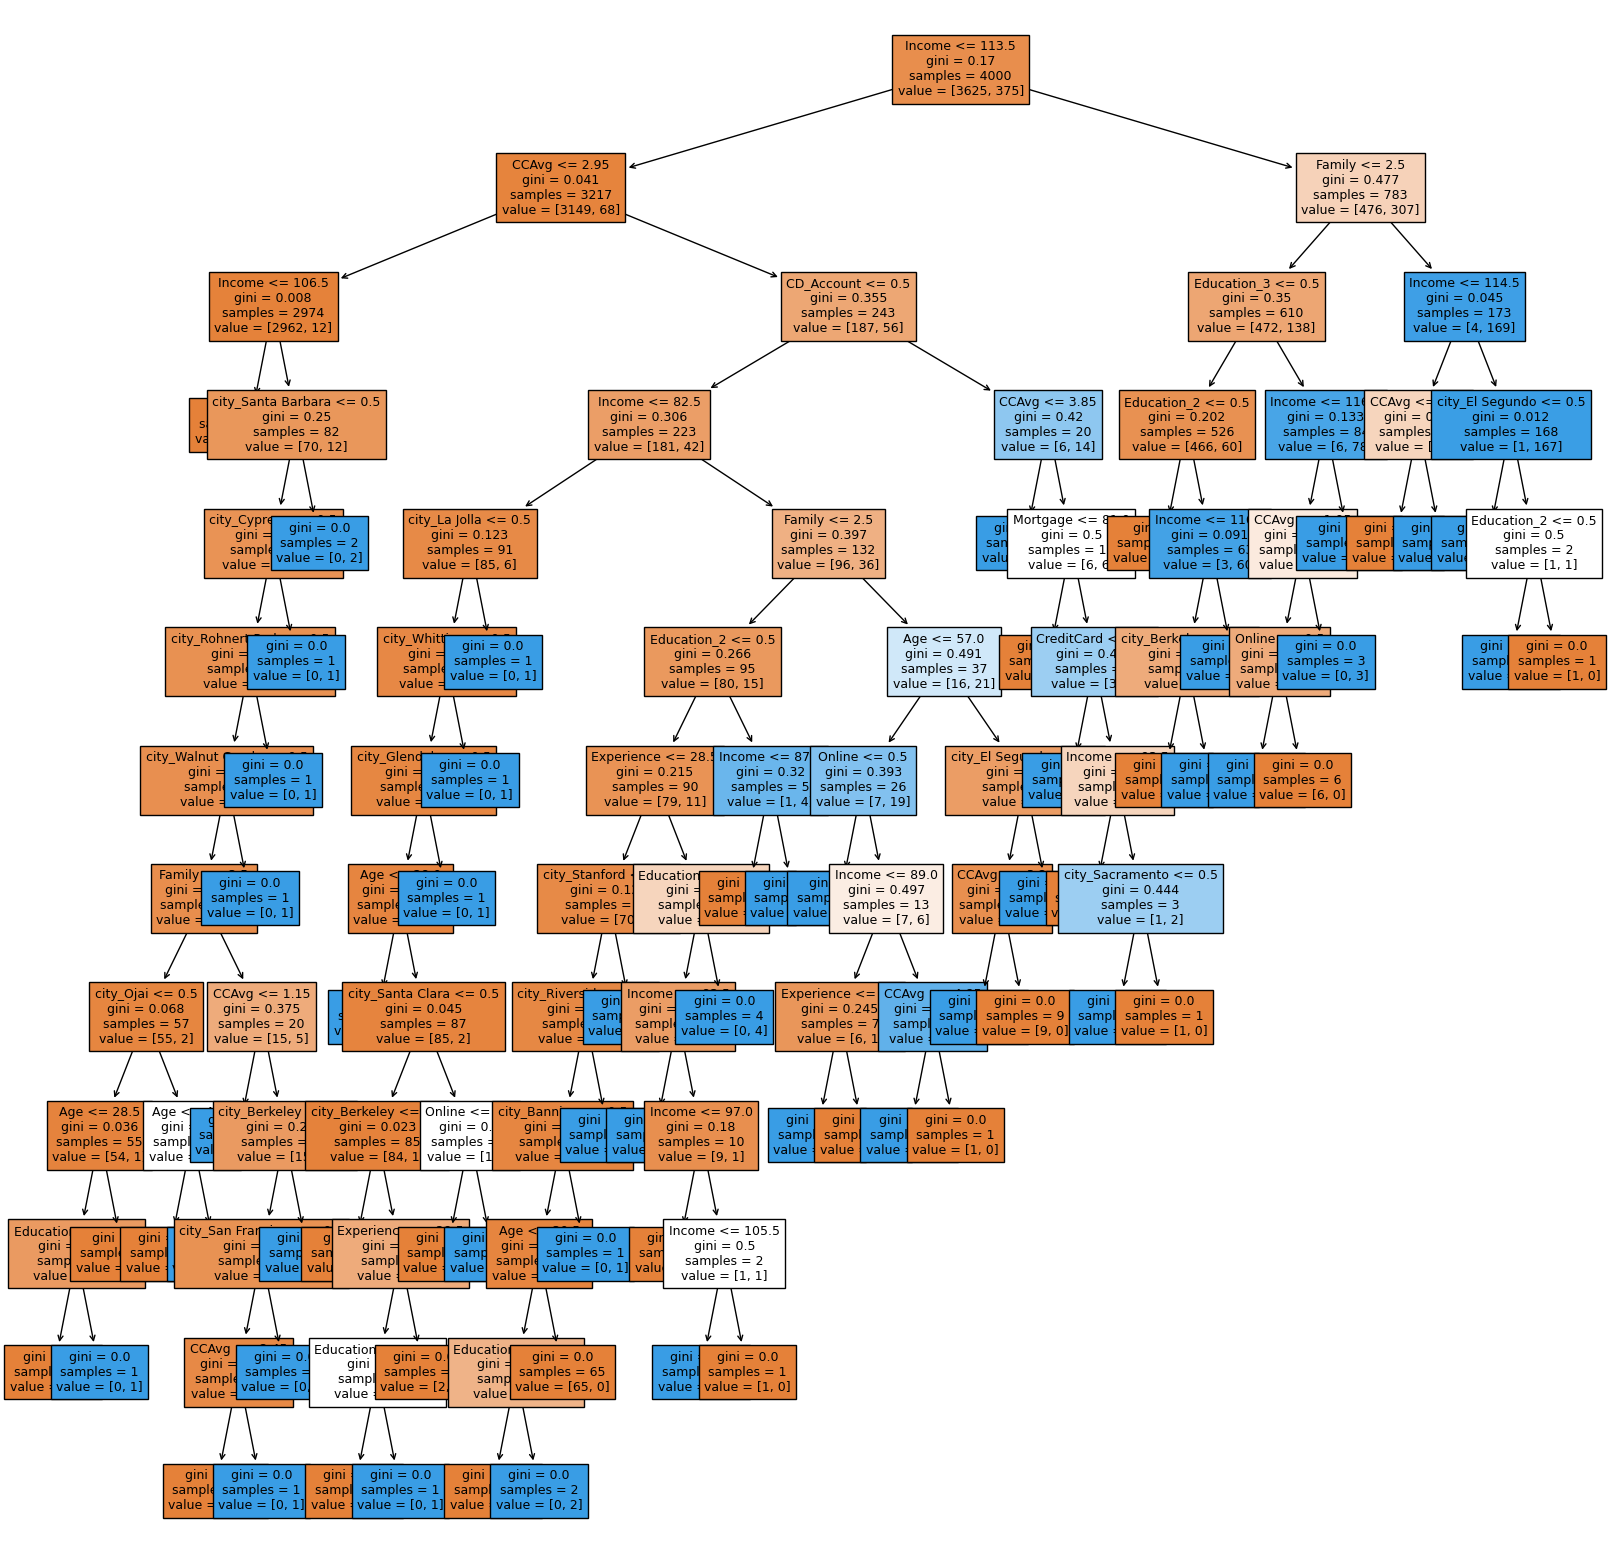

In [169]:
# Visualizing the decision tree built to see if there is overfitting.
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

There is clearly observe a bit of a complex tree but it isn't too bad. Let us look at the text export of this tree.

In [173]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- city_Santa Barbara <= 0.50
|   |   |   |   |--- city_Cypress <= 0.50
|   |   |   |   |   |--- city_Rohnert Park <= 0.50
|   |   |   |   |   |   |--- city_Walnut Creek <= 0.50
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- city_Ojai <= 0.50
|   |   |   |   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [49.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- city_Ojai >  0.50
|   |   |   |   |  

In [174]:
# Plotting feature importance
def view_nd_plot_importance(model, predictors):
    print("The features importances:")
    print(
        pd.DataFrame(
            model.feature_importances_, columns=["Imp"], index=predictors.columns
        ).sort_values(by="Imp", ascending=False)
    )

    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 65))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [predictors.columns[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

The features importances:
                     Imp
Income          0.299656
Family          0.238627
Education_2     0.159803
Education_3     0.151379
CCAvg           0.056098
...                  ...
city_Inglewood  0.000000
city_Irvine     0.000000
city_La Mesa    0.000000
city_La Mirada  0.000000
city_Monrovia   0.000000

[255 rows x 1 columns]


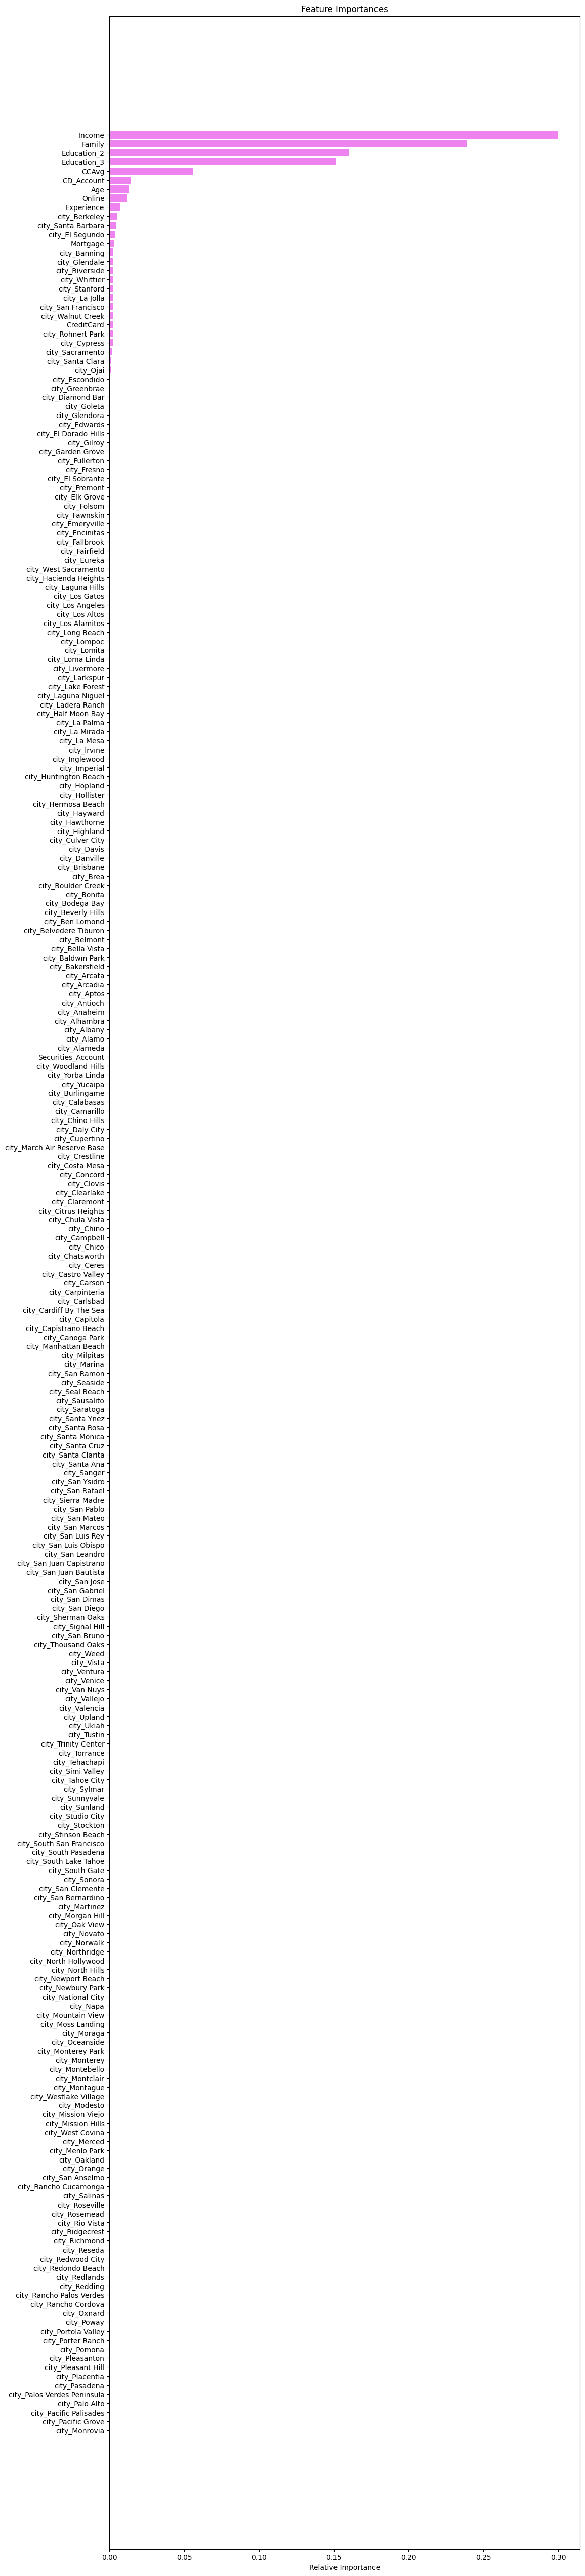

In [175]:
view_nd_plot_importance(dtree1, X_train)

Conclusion - The top 5 features are Education2, Education3, Income, Family size, CCAvg.


## **Model Performance Improvement**

Before we start looking at performance improvement code, we will perform improvement through Pruning. Pruning is further divided into Pre and Post Pruning.

## Pre-Pruning

In [176]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [177]:
# creating an instance of the best model
dtree2 = best_estimator

In [178]:
# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, min_samples_split=30,
                       random_state=42)

### Model Evaluation - Pre-Pruning

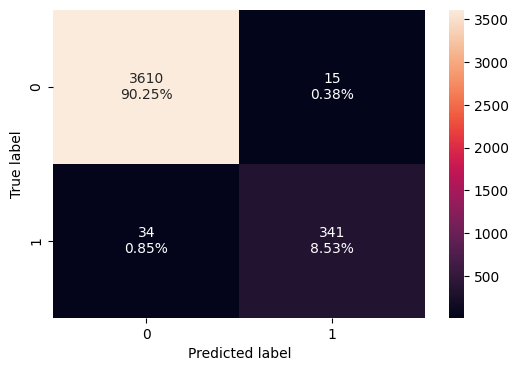

In [179]:
# Confusion Matrix for training data
plot_confusion_matrix(dtree2, X_train, y_train)

In [180]:
# Metrics evaluation for training data
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

Accuracy    Recall  Precision        F1
0   0.98775  0.909333   0.957865  0.932969

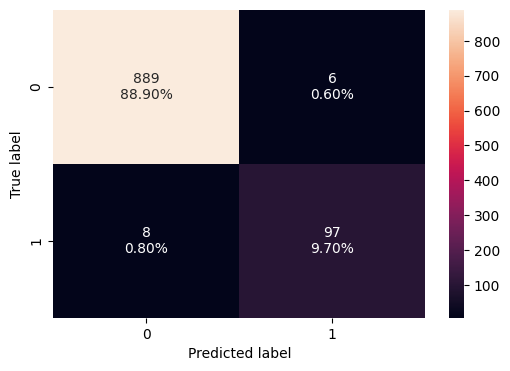

In [181]:
# Confusion Matrix for test data
plot_confusion_matrix(dtree2, X_test, y_test)

In [182]:
#Metrics for test data
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

Accuracy   Recall  Precision        F1
0     0.986  0.92381   0.941748  0.932692

The Training metrics and test metrics are close to each other on the model with Recall, Precision and F1 score indicating a good generalized performance

### Vizualing decision tree (Pre-Pruning)

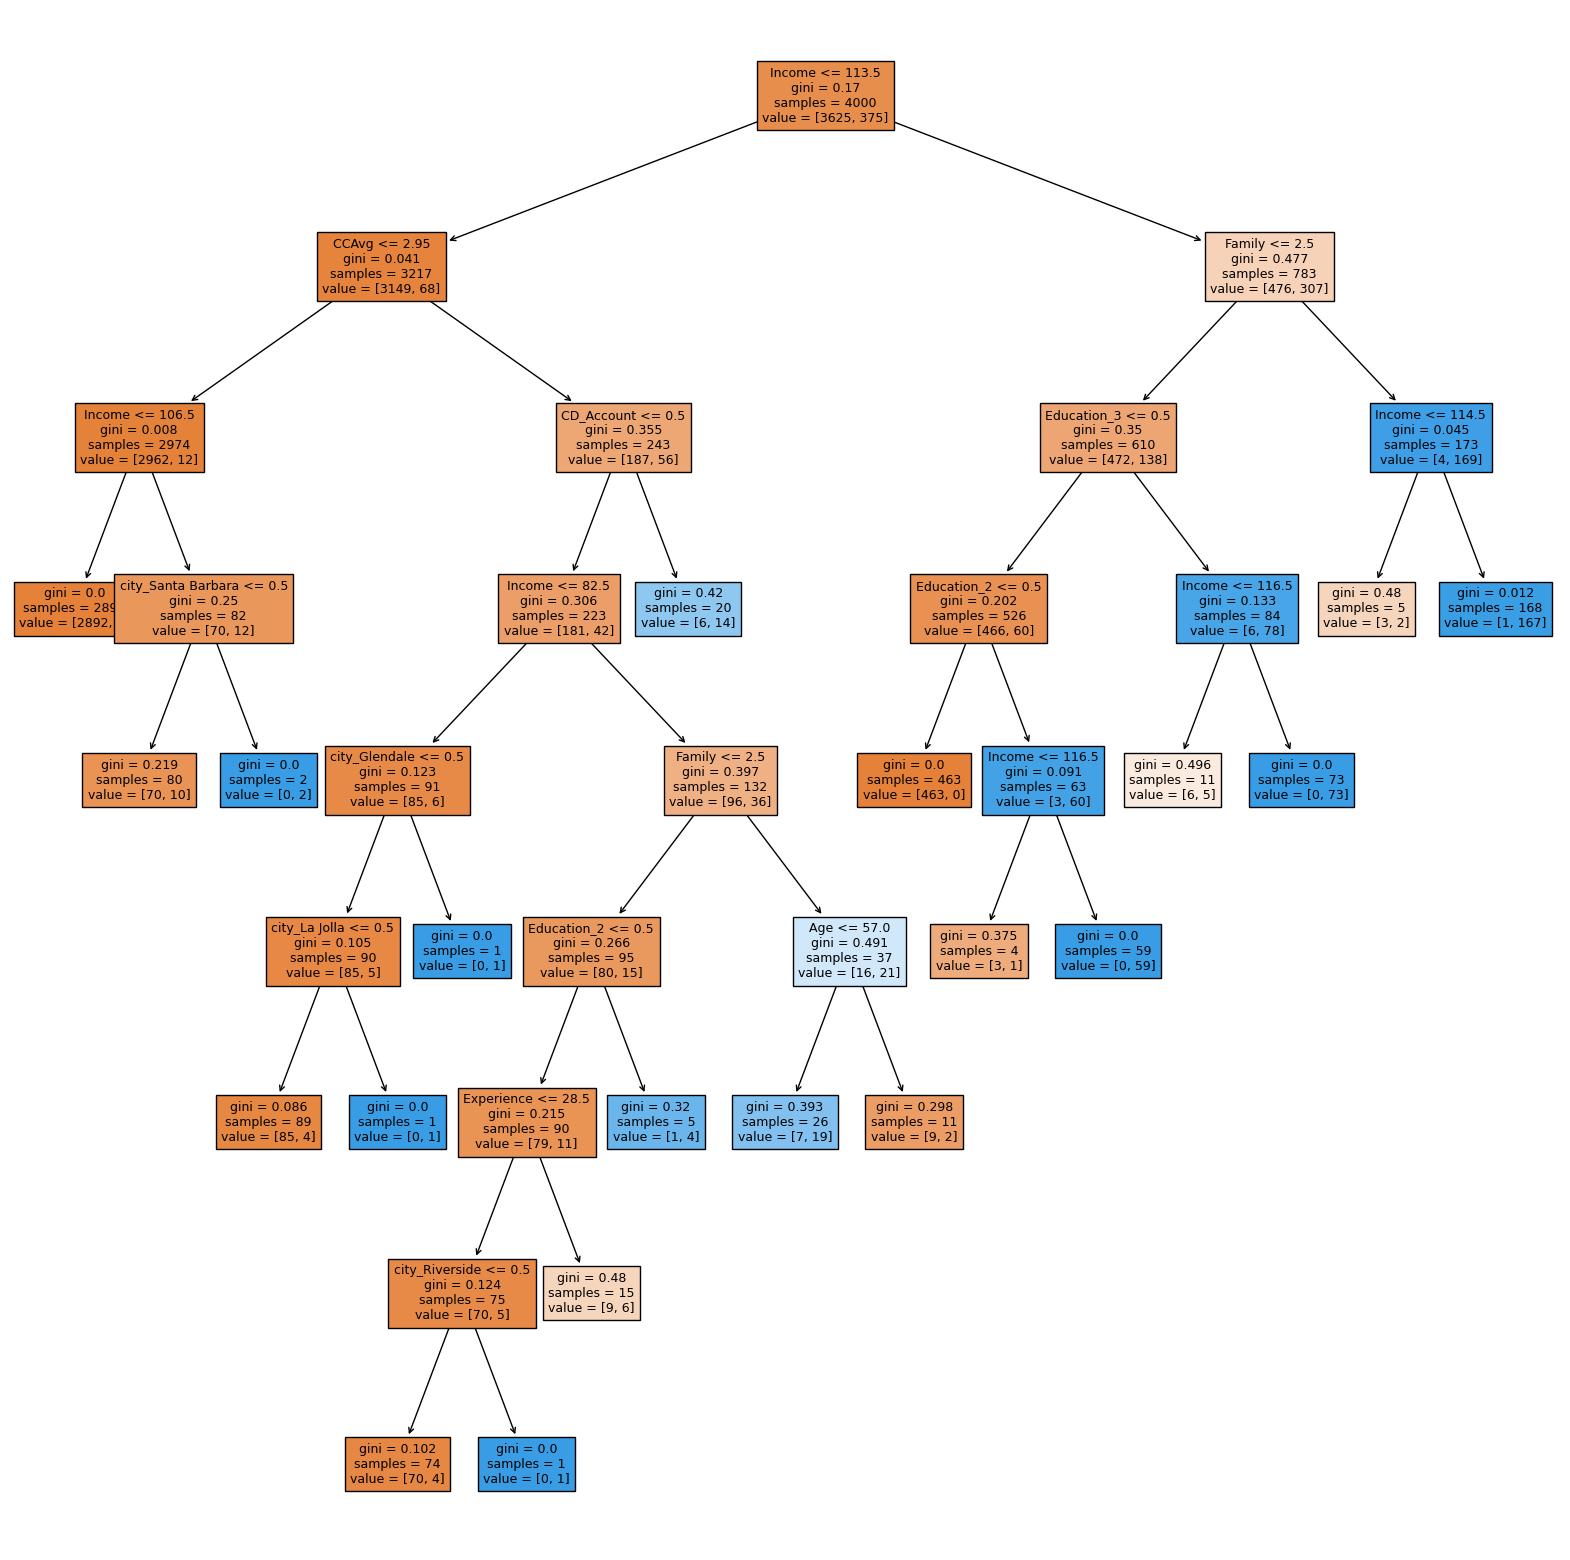

In [187]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

### Feature Importance(Pre-Pruning)

The features importances:
                            Imp
Income                 0.321775
Family                 0.265855
Education_2            0.173489
Education_3            0.158870
CCAvg                  0.038075
...                         ...
city_Hopland           0.000000
city_Huntington Beach  0.000000
city_Imperial          0.000000
city_Inglewood         0.000000
city_Monrovia          0.000000

[255 rows x 1 columns]


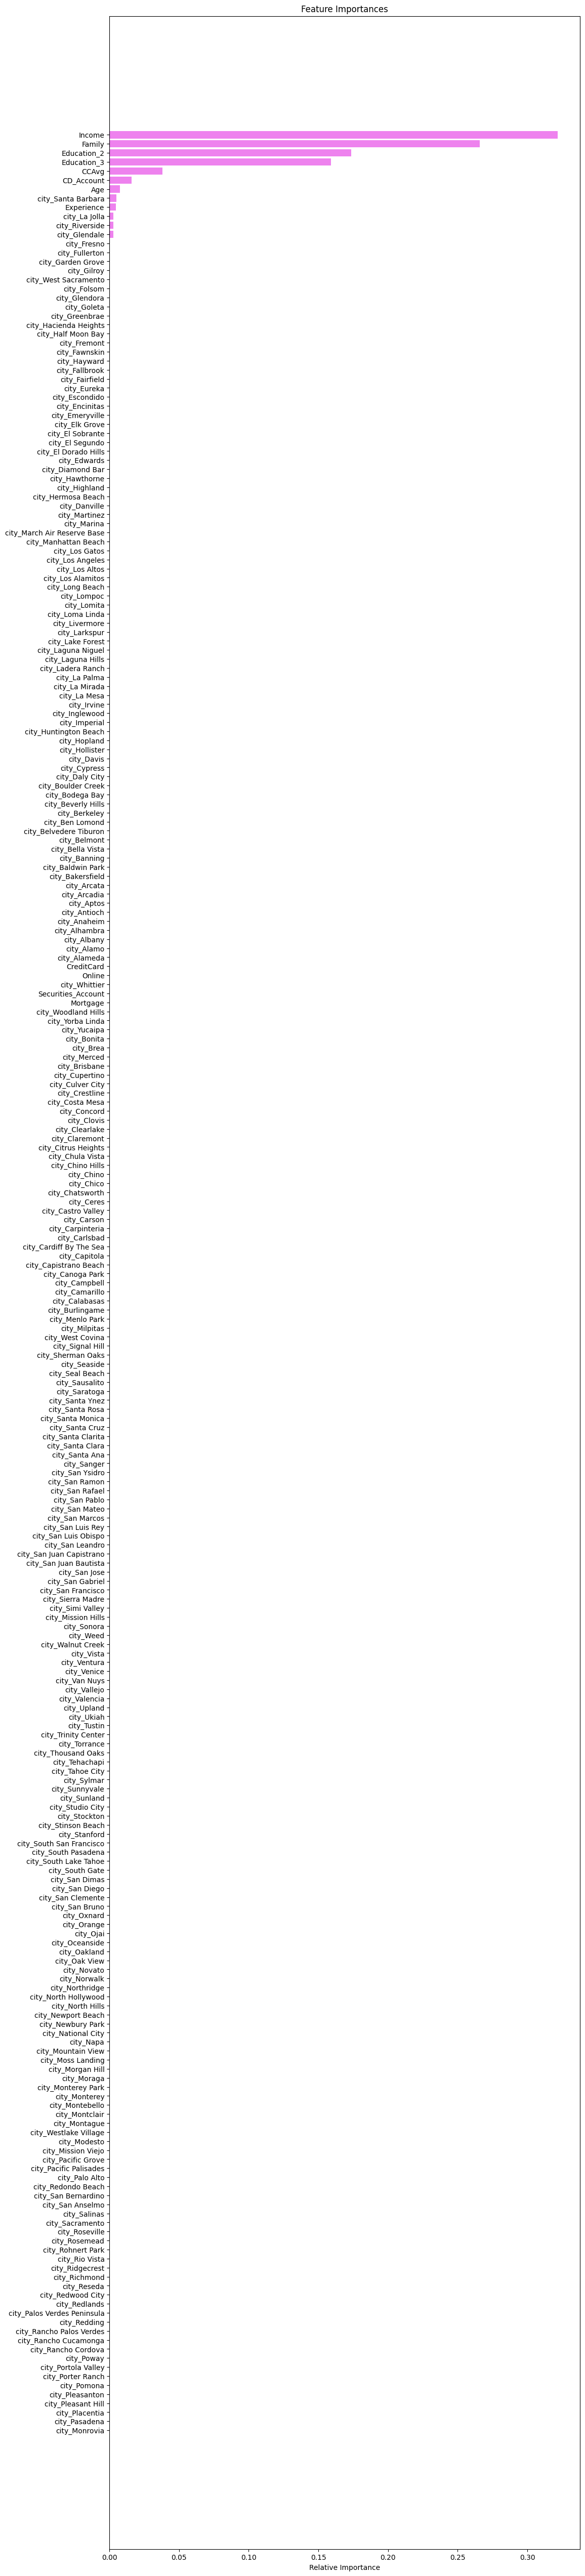

In [188]:
view_nd_plot_importance(dtree2, X_train)

Conclusion -
1. Top 5 features of a pre-pruned tree are Education 2, Education 3, Income, Family, CC Avg

## Post Pruning

In [189]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [190]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000165    0.000494
2     0.000225    0.000944
3     0.000241    0.001909
4     0.000241    0.002392
5     0.000249    0.002889
6     0.000300    0.003489
7     0.000368    0.003857
8     0.000375    0.004232
9     0.000400    0.004632
10    0.000400    0.005032
11    0.000409    0.005850
12    0.000417    0.007100
13    0.000417    0.007517
14    0.000429    0.007946
15    0.000432    0.010106
16    0.000456    0.011931
17    0.000467    0.014264
18    0.000500    0.014764
19    0.000600    0.015364
20    0.000600    0.015964
21    0.000682    0.017328
22    0.000747    0.018075
23    0.000770    0.018845
24    0.000838    0.020521
25    0.000854    0.021375
26    0.000857    0.022232
27    0.000942    0.023174
28    0.001054    0.024228
29    0.001088    0.025316
30    0.001165    0.026480
31    0.001422    0.027902
32    0.001693    0.031289
33    0.002402    0.033691
34    0.005758    0.039449
35    0.024588    0.088625
36    0.037972    0.126597
37    0.043325    0.169922

In [191]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

- Next, we train a decision tree using the effective alphas.

- The last value in `ccp_alphas` is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.

In [192]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04332510361744618


Moving ahead, we remove the last element in clfs and ccp_alphas as it corresponds to a trivial tree with only one node.

In [193]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [194]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [195]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

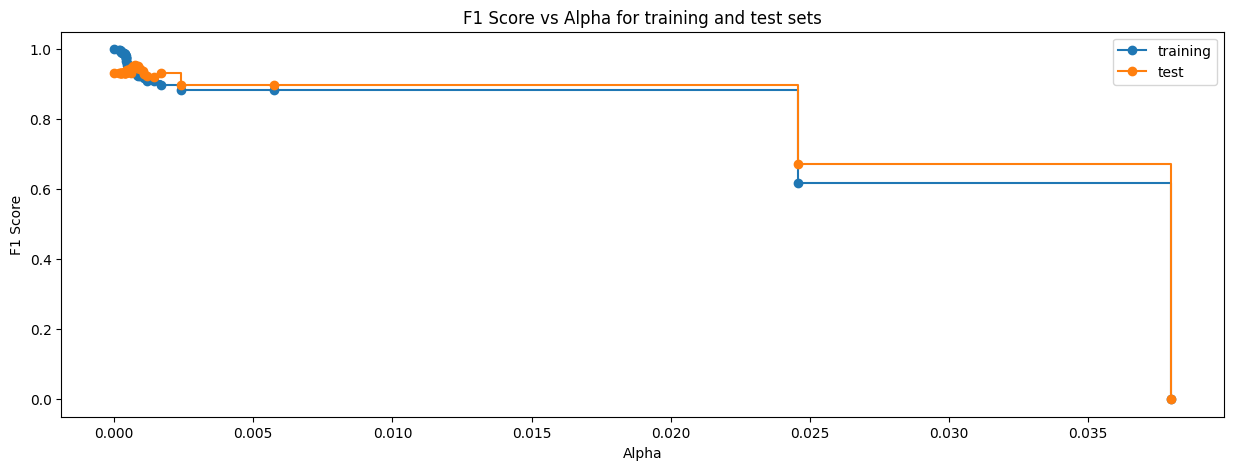

In [196]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [197]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.0007469512195121949, random_state=42)


### Model Evaluation

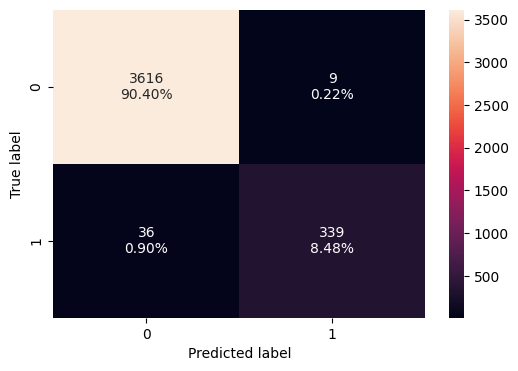

In [198]:
# Plot for training data (Post pruning)
plot_confusion_matrix(dtree3, X_train, y_train)

In [199]:
# Metrics for Training data (Post Pruning)
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

Accuracy  Recall  Precision        F1
0   0.98875   0.904   0.974138  0.937759

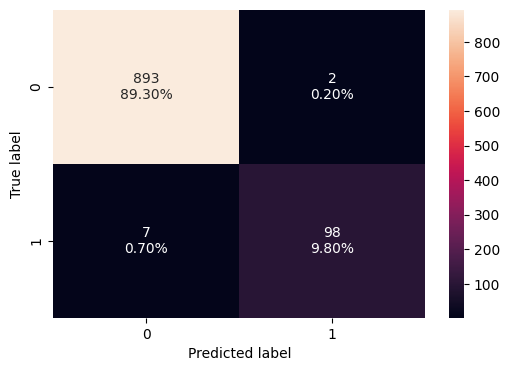

In [200]:
# Confusion matrix for test data(Post Pruning)
plot_confusion_matrix(dtree3, X_test, y_test)

In [201]:
# Metrics for test data (Post Pruning)
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

Accuracy    Recall  Precision        F1
0     0.991  0.933333       0.98  0.956098

Conclusion -
- While the precision and F1 score have some slight differences, the recall score is slightly higher for the test data vs, training data.

- It helps us conclude that false negatives are reduced in the newer data that the model is seeing.

### Visualizing the decision tree

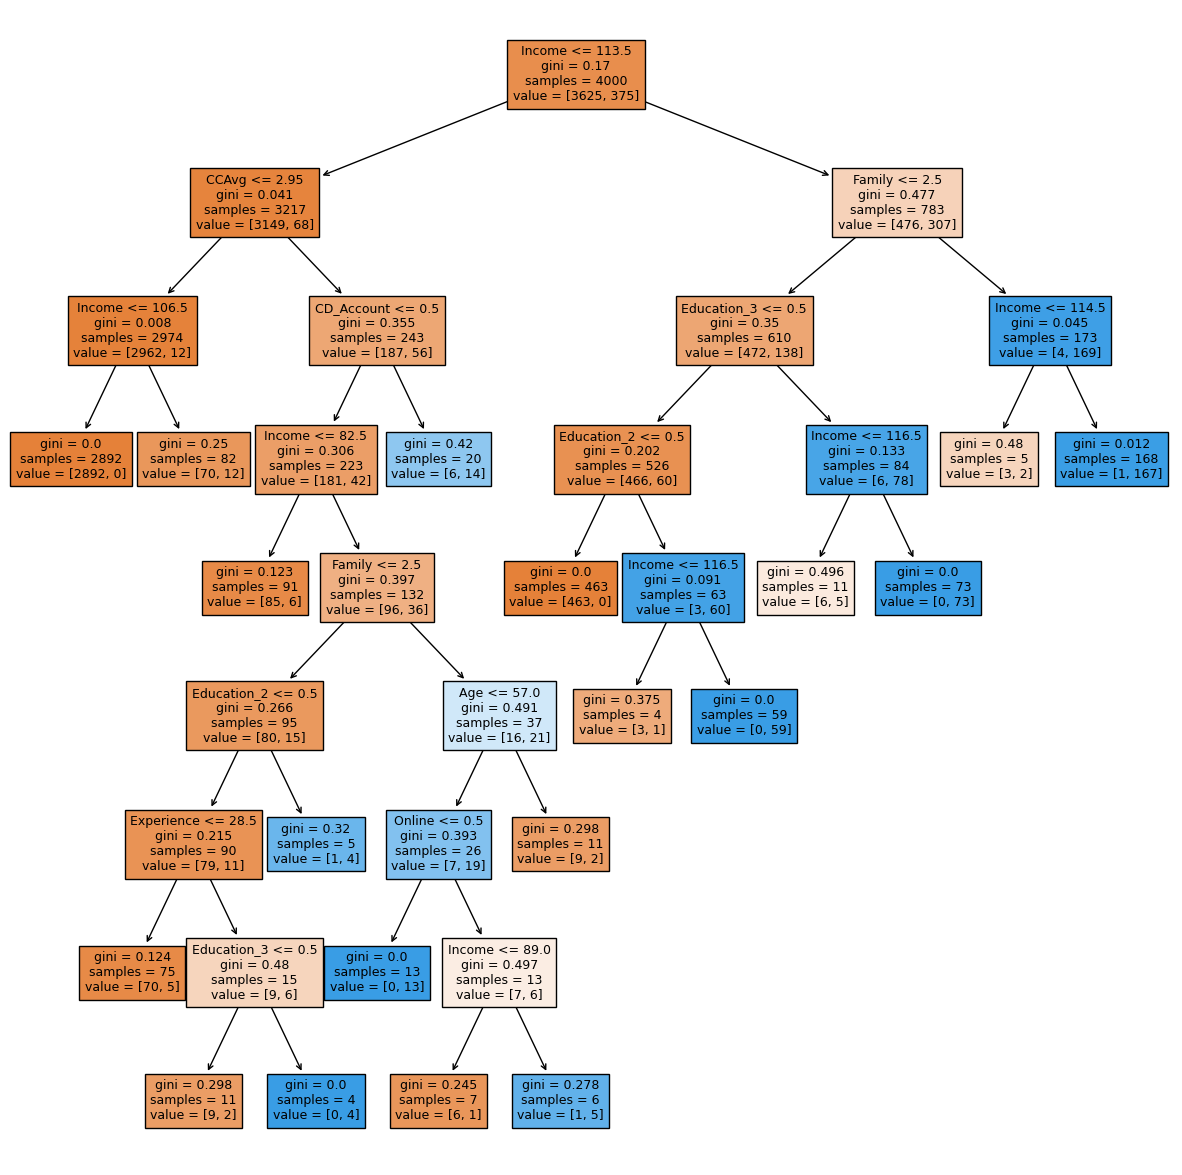

In [202]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(15, 15))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

### Feature importance(post Pruning)

In [203]:
# Feature importance
view_nd_plot_importance(dtree3, X_train)

The features importances:
                            Imp
Income                 0.325546
Family                 0.264780
Education_2            0.172788
Education_3            0.164694
CCAvg                  0.037921
...                         ...
city_Hollister         0.000000
city_Hopland           0.000000
city_Huntington Beach  0.000000
city_Imperial          0.000000
city_Monrovia          0.000000

[255 rows x 1 columns]


Conclsuion - Its far less complex tree than the previous tree. Income, Education 2, Education 3 , Family, CC Avg are some of the visible consistent parameters used to see if a customer accepted a personal loan or not.

## **Model Performance Comparison and Final Model Selection**

### Training performance comparison accross model

In [204]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.987750   
Recall                                 1.0                     0.909333   
Precision                              1.0                     0.957865   
F1                                     1.0                     0.932969   

           Decision Tree (Post-Pruning)  
Accuracy                       0.988750  
Recall                         0.904000  
Precision                      0.974138  
F1                             0.937759

### Testing Performance comparison across 3 models

In [206]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.986000                     0.986000   
Recall                            0.914286                     0.923810   
Precision                         0.950495                     0.941748   
F1                                0.932039                     0.932692   

           Decision Tree (Post-Pruning)  
Accuracy                       0.991000  
Recall                         0.933333  
Precision                      0.980000  
F1                             0.956098

## **Actionable Insights and Business Recommendations**


### Actionable insights -
- Both the pre-pruned and post-pruned decision trees exhibit generalized performances.

- The post-pruned decision tree has an approx. 1.1% better performance on the test set than the training set. Has a recall score which is 2% more than the default model
    
- The pre-pruned decision tree has almost the same performance on training and test sets. This model has the same accuracy than the default model but has higher recall score indicating decrease of false negative.

- We'll move ahead with the post-pruned decision tree as our final model as it exhibits higher accuracy, F1 score, better recall call and clearly a high precision.

### What recommedations would you suggest to the bank?

-  The marketing team can deploy this model for the initial screening of customers who have an CD account in the bank to start with as the top 5 features remain education 2, education 3, income, family size and avg.

-  The marketing team is recommended to study the customers profiles first before approaching them for a personal loan offer. The top 5 features stated in the features list above need to be considered as the target customer profile for a personal loan campaign qualification.



___